# Обработка исключений

## Try-Except
- Специальная конструкция Python для отлова ошибок в процессе выполнения кода. Служит для того чтобы исправлять возникащую или возможно возникающую ошибку в коде.

In [6]:
def divide_func(a,b):
    return a/b

print(divide_func(10,5))

2.0


In [7]:
print(divide_func(10,0))


ZeroDivisionError: division by zero

Если в блоке except не указывать какую именно ошибку мы изолируем, то обрабатываться будут абсолютно все ошибки, применят на свой страх и риск, так как в дальнейшем может превести к непредвиденным последствиям. Лучшее применения такого способа исключительно для логирования ошибки.

In [8]:
def divide_func(a,b):
    try:
        return a/b
    except: # Принимает все возможные ошибки
        return 0

print(divide_func(10,0))

0


Блоков Except у try может сколь-угодно много. Однако try в контексте определенной проверки может быть только один

In [18]:
def divide_func(a,b):
    try:
        return a/b
    except ZeroDivisionError:
        return 0
    except TypeError:
        return 'Ошибка. Неверно переданы параметры'
    
print('Старт')
print(divide_func('a', 0))
print('Конец')

Старт
Ошибка. Неверно переданы параметры
Конец


Также есть возможность указывать для одного блока except несколько различных ошибок

In [25]:
def divide_func():
    try:
        a = int(input())
        b = int(input())
        return a/b
    except ZeroDivisionError as e:
        print(f'Зафиксирована ошибка: {e}')
        return 0
    except (TypeError, ValueError) as e:
        return f'Ошибка. Неверно переданы параметры | {e}'


print(divide_func())
    

Зафиксирована ошибка: division by zero
0


raise - конструкция которая ВЫЗЫВАЕТ ошибку в месте где было записано(объявлено)

Exception - Родитель всех ошибок. И при вызове будет исполняться первее

Порядок обработки ошибки, должен быть всегда от частного(TypeError) к общему(Exception). Также есть внутренние группы ошибок такие как ArifmeticError (ZeroDivisonError его потомок), поэтому указать родителя ошибки, то это будет общий случай для этой группы ошибок

In [32]:
def divide_func():
    try:
        raise NameError('Какой то текст ошибки')
        a = int(input())
        b = int(input())
        return a/b
    except ZeroDivisionError as e:
        print(f'Зафиксирована ошибка: {e}')
        return 0
    except ArithmeticError as e:
        print(f'Зафиксирована ошибка верхнего порядка: {e}')
        return None
    except (TypeError, ValueError) as e:
        return f'Ошибка. Неверно переданы параметры | {e}'
    except Exception as e:
        return f'Ошибка {e}'


print(divide_func())
    

Ошибка division by zero


finally - это конструкция которая исполняется в любом случае после выполнения блока try-except и её основной смысл это сделать заключающие(завершающие)действия в отношении той структуры кода которая требует специального завершения(завершение эмулятора, конец работы с БД)

In [34]:
def divide_func():
    try:
        raise NameError('Какой то текст ошибки')
        a = int(input())
        b = int(input())
        return a/b
    except ZeroDivisionError as e:
        print(f'Зафиксирована ошибка: {e}')
        return 0
    except ArithmeticError as e:
        print(f'Зафиксирована ошибка верхнего порядка: {e}')
        return None
    except (TypeError, ValueError) as e:
        return f'Ошибка. Неверно переданы параметры | {e}'
    except Exception as e:
        return f'Ошибка {e}'
    finally:
        print('Работа функции завершена')


print(divide_func())

Работа функции завершена
Ошибка Какой то текст ошибки


In [35]:
try:
    1
finally:
    print('Отработано')

Отработано


# Стек вызова исключения

При работе с вызовом исключений в последоавтельных функциях (которые вызываются внутри друг друга) если происходит ошибка, то ход функции завершатся выбрасыванием Exception до тех пор пока не будет отловлен теми функциями в последовательности которые в свою очередь участвуют в стеке вызова.

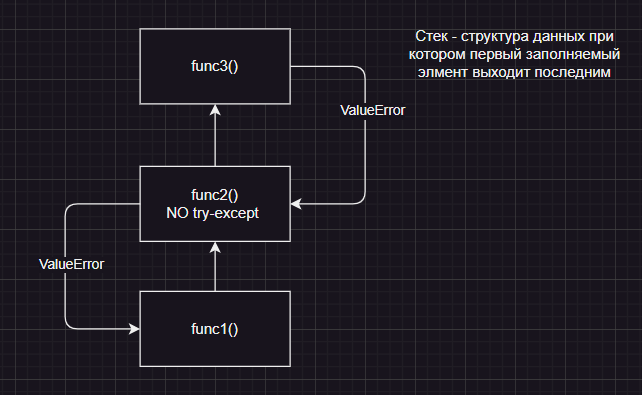



In [2]:
def func1():
    print('Запуск основной функции')
    try:
        func2() # Однако при отлове ошибок, код продолжится в той функции которая успела отловить и обработать ошибку
    except ValueError as e:
        print(f'Произошла ошибка {e}')
    print('Завершение основной функции')

def func2():
    print('Запуск функции 2')
    func3() # все что указано ниже не запустится
    print('Конец работы второй функции')

def func3():
    print('Запуст 3ей функции')
    raise ValueError

func1()

Запуск основной функции
Запуск функции 2
Запуст 3ей функции
Произошла ошибка 
Завершение основной функции


# Создание собственных исключений

Собственные исключения создаются на основе класса Exception, и должно содержать параметр message который будет передаваться первым аргументом в init метод Exception `(super().__init__(...))`.

In [1]:
class MyException(Exception):
    def __init__(self,reason , message='Произошла ошибка в коде: %s',*args):
        self.reason = reason
        self.message = message % reason
        super().__init__(self.message,*args)

def func1():
    print('Запуск основной функции')
    try:
        func2() 
    except MyException as e:
        print(e.message)
    print('Завершение основной функции')

def func2():
    raise MyException('Какая то причина...')

func1()

Запуск основной функции
Произошла ошибка в коде: Какая то причина...
Завершение основной функции


In [25]:
class NegativeAgeError(Exception):
    def __init__(self, age, message="Возраст не может быть отрицательным."):
        self.age = age
        self.message = message
        super().__init__(self.message)
    

def check_age(age):
    if age < 0:
        raise NegativeAgeError(age)

def get_user_age():
    try:
        age = int(input("Введите ваш возраст: "))
        check_age(age)
    except ValueError:
        print("Ошибка: введено не число. Пожалуйста, введите корректный возраст.")
    except NegativeAgeError as e:
        print(f"Ошибка: {e} Введённый возраст: {e.age}.")
    else:
        print(f"Ваш возраст: {age} лет")
    finally:
        print('Завершение программы...')

get_user_age()


Ошибка: Возраст не может быть отрицательным. Введённый возраст: -24.
Завершение программы...
